#### Available scene list

In [1]:
import json


f = open('../../01/01_scene_list/scene.json', "r")
scene_json = json.load(f)

# Available scene list
scene_list = list(scene_json.keys())

# Coordinate conversion
scene_dict = scene_json

f.close()

#### Sample from trajectory

In [9]:
import os
from PIL import Image
import matplotlib.pyplot as plt


def vis_position(ds_pth, scene_id):
    
    sp_list = os.listdir(ds_pth)
    fig, ax = plt.subplots()
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
        
    # Read map image
    mp_pth = "E:\datasets\iGibson-dataset\scene_map/"
    mp_pth = f"{mp_pth}/{scene_id}/{scene_id}.png"
    mp_img = Image.open(mp_pth).convert("RGB")
    plt.imshow(mp_img)
    
    # Read position ground truth
    scene_trans = scene_dict[scene_id]
    
    sp_x = []
    sp_y = []
    
    for sp in sp_list:
        
        sp_pth = f"{ds_pth}/{sp}/gt/0000_0.txt"
        sp_fp = open(sp_pth, encoding="utf-8")
        sp_data = (sp_fp.readlines())[0].replace("\n", "").split(",")
        sp_x.append(float(sp_data[0]) * scene_trans[2] + scene_trans[0])
        sp_y.append(float(sp_data[1]) * scene_trans[2] + scene_trans[1])
        
    plt.scatter(sp_x, sp_y)
    
    plt.show()

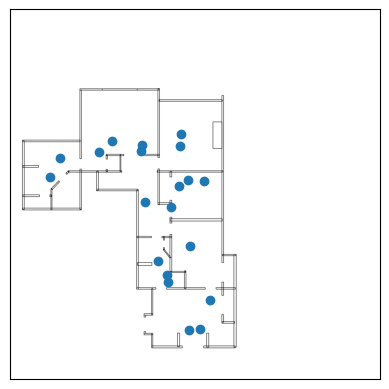

In [10]:
ds_pth = "E:/datasets/iGibson-dataset/position_rd_no_obj/Beechwood_1_int/"
scene_id = ds_pth.split("/")[-2]

vis_position(ds_pth, scene_id)